# Lab: Joining and Analyzing Movie and Review Data
##            ._____________________________Lab 07__________________________________

### Task 1 - Data Preparation and Exploration:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv("movies.csv")
reviews = pd.read_csv("reviews.csv")

print(movies.head())
print()
print(reviews.head())
print()
print(movies.describe())
print()
print(reviews.describe())


   movie_id                     title   genre  release_year
0         1  The Shawshank Redemption   Drama          1999
1         2             The Godfather   Drama          1987
2         3           The Dark Knight   Drama          1993
3         4          Schindler's List   Crime          2002
4         5              Pulp Fiction  Action          1980

   review_id  movie_id      reviewer  rating review_date
0          1        96      Jane Doe     8.0  2020-02-17
1          2        90  Victor Scott     1.8  2020-08-22
2          3        32    Yara Baker     1.8  2020-03-10
3          4        77  Victor Scott     5.2  2020-04-24
4          5        16  Mia Martinez     6.3  2020-04-13

         movie_id  release_year
count  100.000000    100.000000
mean    50.500000   2001.670000
std     29.011492     13.758417
min      1.000000   1980.000000
25%     25.750000   1988.000000
50%     50.500000   2001.500000
75%     75.250000   2014.250000
max    100.000000   2023.000000

       

### Task 2. Highest Rated Movies:

###### Perform an inner join on the movies and reviews dataframes based on the movie_id column.

In [2]:
inner_movies_reviews = pd.merge(movies, reviews, on = 'movie_id')
print("The result of the inner join is:")
print(inner_movies_reviews.head())
print()

The result of the inner join is:
   movie_id                     title  genre  release_year  review_id  \
0         1  The Shawshank Redemption  Drama          1999         40   
1         1  The Shawshank Redemption  Drama          1999        151   
2         1  The Shawshank Redemption  Drama          1999        153   
3         1  The Shawshank Redemption  Drama          1999        167   
4         3           The Dark Knight  Drama          1993        129   

       reviewer  rating review_date  
0     Ivy White     4.4  2020-04-04  
1  Quinn Walker     7.7  2020-01-23  
2  Sophia Allen     9.0  2020-01-27  
3  Henry Harris     8.7  2020-06-17  
4      Uma King     9.8  2020-03-12  



In [3]:
inner_movies_reviews.isnull().sum()

movie_id        0
title           0
genre           0
release_year    0
review_id       0
reviewer        0
rating          0
review_date     0
dtype: int64

In [4]:
inner_movies_reviews.isna().sum() 

movie_id        0
title           0
genre           0
release_year    0
review_id       0
reviewer        0
rating          0
review_date     0
dtype: int64

In [5]:
duplicates = inner_movies_reviews[inner_movies_reviews.duplicated()]
dup_sum = duplicates.duplicated().sum()
dup_sum

0

In [6]:
inner_movies_reviews.info()
# Performin the info function I found out that review date formart came as "object".  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      300 non-null    int64  
 1   title         300 non-null    object 
 2   genre         300 non-null    object 
 3   release_year  300 non-null    int64  
 4   review_id     300 non-null    int64  
 5   reviewer      300 non-null    object 
 6   rating        300 non-null    float64
 7   review_date   300 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB


In [7]:
inner_movies_reviews["review_date"] = pd.to_datetime(inner_movies_reviews["review_date"])
inner_movies_reviews.info()
# To make it a calculable column, I change the data type to datetime.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movie_id      300 non-null    int64         
 1   title         300 non-null    object        
 2   genre         300 non-null    object        
 3   release_year  300 non-null    int64         
 4   review_id     300 non-null    int64         
 5   reviewer      300 non-null    object        
 6   rating        300 non-null    float64       
 7   review_date   300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 18.9+ KB


In [8]:
inner_movies_reviews.columns

Index(['movie_id', 'title', 'genre', 'release_year', 'review_id', 'reviewer',
       'rating', 'review_date'],
      dtype='object')

###### Calculate the average rating for each movie.

In [9]:
title_rating = inner_movies_reviews[["title", "rating"]]
title_rating

,title,rating
0,The Shawshank Redemption,4.4
1,The Shawshank Redemption,7.7
2,The Shawshank Redemption,9.0
3,The Shawshank Redemption,8.7
4,The Dark Knight,9.8
...,...,...
295,Life of Pi,4.8
296,Life of Pi,2.1
297,The Aviator,8.3
298,The Aviator,6.5


In [10]:
avg_movies_rating = inner_movies_reviews.groupby("title")["rating"].mean()
avg_movies_rating

title
3 Idiots              3.300000
A Beautiful Mind      7.625000
A Clockwork Orange    7.300000
Alien                 3.133333
Aliens                5.400000
                        ...   
Vertigo               9.350000
WALL-E                6.000000
Whale Rider           4.250000
Whiplash              7.300000
Your Name             6.250000
Name: rating, Length: 96, dtype: float64

###### Identify the top 10 highest-rated movies
###### Display the titles and average ratings of these top 10 movies.

In [11]:
top_10_rating = avg_movies_rating.sort_values(ascending = False)
top_10_rating

title
The Dark Knight             9.800000
Vertigo                     9.350000
City Lights                 9.250000
Jaws                        8.600000
Grave of the Fireflies      8.000000
                              ...   
The Green Mile              2.900000
The Silence of the Lambs    2.833333
Parasite                    2.800000
Django Unchained            2.750000
Goodfellas                  2.725000
Name: rating, Length: 96, dtype: float64

### Task. 3. Genre Analysis:

###### Group the joined dataframe by genre and calculate the average rating for each genre.
###### Determine which genre has the highest average rating.
###### Display the genres along with their average ratings.

In [12]:
avg_rating_genre = inner_movies_reviews.groupby("genre")["rating"].mean()
avg_rating_genre.sort_values(ascending = False)


genre
Sci-Fi       6.118421
Fantasy      5.768421
Biography    5.279310
Drama        5.204478
Action       5.109375
Crime        4.901493
Name: rating, dtype: float64

###  Task 4. Reviewer Analysis:

###### Identify the top 5 reviewers who have given the most reviews.

In [13]:
reviwers_ratings = inner_movies_reviews[["reviewer", "rating"]]
count_reviews = reviwers_ratings.groupby("reviewer")["rating"].count()
c_r = count_reviews.reset_index()
print(c_r.sort_values(by = "rating", ascending = False))
c_r_5 = (c_r.sort_values(by = "rating", ascending = False)).head()
c_r_5


          reviewer  rating
20       Tom Young      18
21        Uma King      16
6     Henry Harris      15
10      John Smith      14
25      Yara Baker      13
18       Ryan Hall      13
7        Ivy White      13
15    Olivia Clark      13
12     Liam Garcia      13
0    Alice Johnson      12
13    Mia Martinez      12
8      Jack Martin      12
5        Grace Lee      12
4     Frank Wilson      12
11  Kathy Thompson      11
9         Jane Doe      11
23     Wendy Green      11
1        Bob Brown      10
3      Emily Evans      10
24    Xander Adams      10
2    Charlie Davis      10
22    Victor Scott       9
26     Zane Carter       9
19    Sophia Allen       8
14   Noah Robinson       5
17    Quinn Walker       5
16      Paul Lewis       3


,reviewer,rating
20,Tom Young,18
21,Uma King,16
6,Henry Harris,15
10,John Smith,14
25,Yara Baker,13


###### Calculate the average rating given by each of these top 5 reviewers.
###### Display the reviewer names and their average ratings.

In [14]:
avg_reviewers = reviwers_ratings.groupby("reviewer")["rating"].mean()
avg_reviewers_sort = avg_reviewers.sort_values(ascending = False)
# avg_reviewers_sort.head()
avg_reviewers_sort.iloc[:5]

reviewer
Jane Doe         7.300000
Ryan Hall        7.030769
Grace Lee        6.266667
Charlie Davis    6.240000
Mia Martinez     6.183333
Name: rating, dtype: float64

### Task 5. Time-Based Analysis:

###### Analyze how movie ratings have changed over time.

In [15]:
ma = inner_movies_reviews["review_date"].max()
ma # Checking the oldest review date of the data frame

Timestamp('2020-10-26 00:00:00')

In [16]:
mi = inner_movies_reviews["review_date"].min()

mi # Checking the newest review date of the data frame


Timestamp('2020-01-01 00:00:00')

###### Group the joined dataframe by the month extracted from the review_date column and calculate the average rating for each month.
###### Create a line plot showing the trend of average movie ratings over time.

Text(0.5, 1.0, 'Rating Over Time')

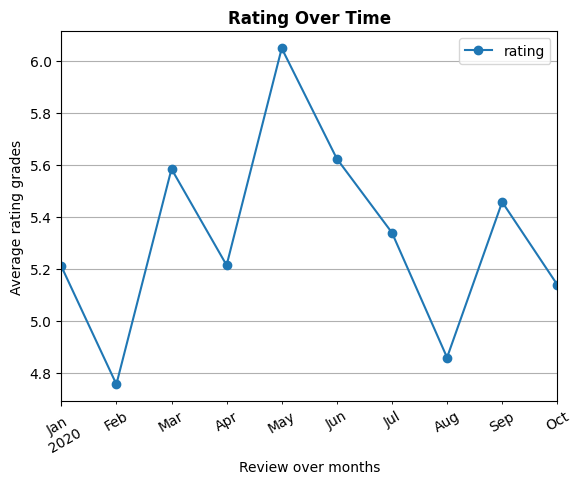

In [17]:
inner_movies_reviews = pd.merge(movies, reviews, on = 'movie_id') # Merging again to avoid jupyter errors
inner_movies_reviews["review_date"] = pd.to_datetime(inner_movies_reviews["review_date"]) # changing review_date Dtype again to avoid jupyter errors.
rating_over_time = inner_movies_reviews[["review_date", "rating"]].copy() # Needed to create a copy to make the jupyter allow me to do the changes below
rating_over_time.set_index("review_date", inplace = True) # Set review_date as index
rating_over_time.sort_index(inplace = True) # Sorting review_date to guarantee the ascending order on x axis.
rating_over_time = rating_over_time.resample("ME").mean() # selecting only the months of the review_date column

rating_over_time.plot(kind = "line", rot = 30, marker = "o")
plt.grid(True)
plt.xlabel("Review over months")
plt.ylabel("Average rating grades")
plt.title("Rating Over Time", weight = "bold")


Text(0.5, 1.0, 'Rating Over Time')

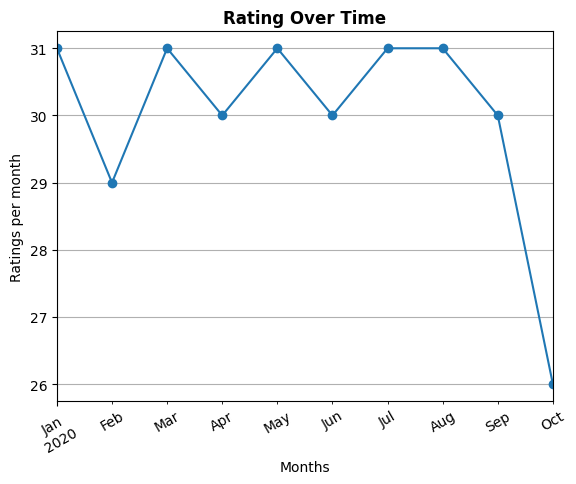

In [18]:
inner_movies_reviews = pd.merge(movies, reviews, on = 'movie_id')
inner_movies_reviews["review_date"] = pd.to_datetime(inner_movies_reviews["review_date"])
inner_movies_reviews.set_index("review_date", inplace = True)
# inner_movies_reviews.sort_index(inplace = True)
rating_over_time = inner_movies_reviews["rating"].resample("ME").count()
# rating_over_time
rating_over_time.plot(kind = "line", rot = 30, marker = "o")
plt.grid(True)
plt.xlabel("Months")
plt.ylabel("Ratings per month")
plt.title("Rating Over Time", weight = "bold")

In [19]:
inner_movies_reviews = pd.merge(movies, reviews, on = 'movie_id')
inner_movies_reviews["review_date"] = pd.to_datetime(inner_movies_reviews["review_date"])
inner_movies_reviews.set_index("review_date", inplace = True)
inner_movies_reviews.sort_index(inplace = True)
rating_over_time = inner_movies_reviews["rating"].resample("ME").mean()
rating_over_time.mean()

5.322567696300733

#### Discuss any observable trends.
###### May had the best rating average
###### Feb had the worst rating average
###### Even though Oct had the smaller number of ratings, it got close to the mid-level grade rate.

### Task 6. Movies with Most Reviews:

###### Identify the top 10 movies that have received the most reviews.
###### Display the titles of these movies along with the number of reviews they have received.

In [20]:
inner_movies_reviews = pd.merge(movies, reviews, on = 'movie_id')
top_10_review_count = inner_movies_reviews.groupby("title")["rating"].count()
sort_top_10_review_count = top_10_review_count.sort_values(ascending = False)
sort_top_10_review_count.iloc[:10]

title
Full Metal Jacket        7
Interstellar             7
Paths of Glory           6
It's a Wonderful Life    6
Memento                  6
The Truman Show          6
Shutter Island           6
The Revenant             6
Capernaum                6
The Hunt                 5
Name: rating, dtype: int64

### Task 7. Distribution of Ratings:

###### Create a histogram to visualize the distribution of ratings.

Text(0.5, 1.0, 'Distribution of ratings')

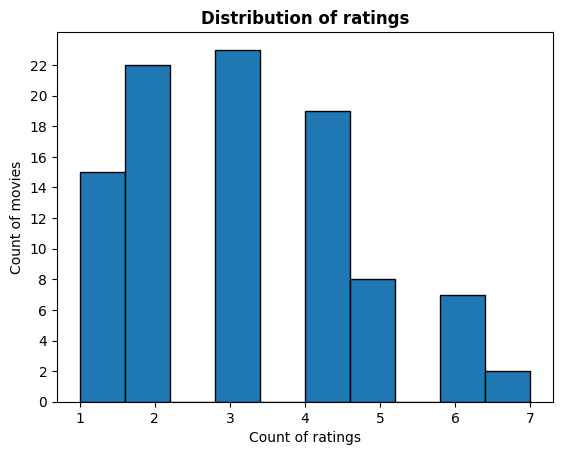

In [21]:
inner_movies_reviews = pd.merge(movies, reviews, on = 'movie_id')

ax = sort_top_10_review_count.plot(kind = "hist", y = "title", edgecolor = "black")
ax.set_yticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
plt.ylabel("Count of movies")
plt.xlabel("Count of ratings")
plt.title("Distribution of ratings", weight = "bold")

###### Analyze the distribution and discuss any skewness or patterns observed in the ratings.

In [22]:
print(sort_top_10_review_count.describe())
print()
print("The mode is:\n",sort_top_10_review_count.mode())
# Most of the movies received fewer than 4 reviews.

count    96.000000
mean      3.125000
std       1.544089
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       7.000000
Name: rating, dtype: float64

The mode is:
 0    3
Name: rating, dtype: int64


###

### Task 8. Impact of Release Year:

###### Analyze if there is any correlation between the release year of a movie and its average rating.
###### Create a scatter plot showing the relationship between the release year and the average rating.

<Axes: xlabel='release_year', ylabel='rating'>

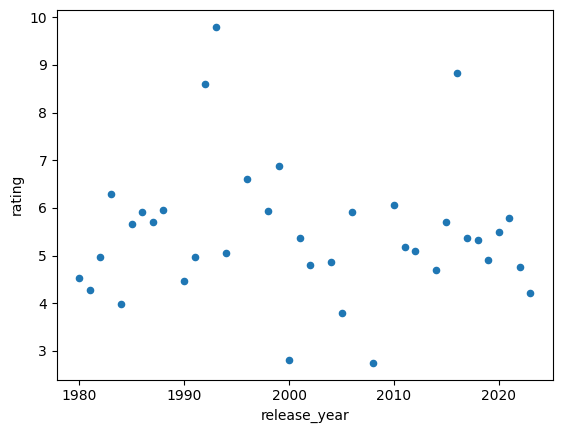

In [23]:
inner_movies_reviews = pd.merge(movies, reviews, on = 'movie_id')
correlation_release_rating = inner_movies_reviews.groupby("release_year")["rating"].mean()
sort_correlation_release_rating = correlation_release_rating.sort_values(ascending = False) # Series
sort_correlation_release_rating
df_sort_corr_rel_rat = sort_correlation_release_rating.reset_index() # Converting the series in dataframe to perform the scatter plot.
df_sort_corr_rel_rat.plot(kind = "scatter", x = "release_year", y = "rating")

###### Discuss any observable patterns or correlations.

### Task 9. Reviewer Consistency:

###### For each reviewer, calculate the standard deviation of their ratings.
###### Identify the most and least consistent reviewers based on the standard deviation of their ratings.
###### Display the names of these reviewers along with their standard deviations.

In [24]:
inner_movies_reviews = pd.merge(movies, reviews, on = 'movie_id')
reviwer_ratings = inner_movies_reviews.groupby("reviewer")["rating"].std()
reviwer_ratings_sort = reviwer_ratings.sort_values(ascending = False)
r_r_s = reviwer_ratings_sort.reset_index()
print(r_r_s)
print()
print(f"The least consistent reviewers is: {r_r_s["reviewer"].iloc[0]} with the standard deviation as {r_r_s["rating"].iloc[0]}")
print(f"The MOST consistent reviewers is: {r_r_s["reviewer"].iloc[-1]} with the standard deviation as {r_r_s["rating"].iloc[-1]}")

          reviewer    rating
0      Zane Carter  3.567718
1    Alice Johnson  3.293094
2       Yara Baker  3.128221
3        Bob Brown  2.961681
4      Jack Martin  2.849389
5         Uma King  2.742748
6     Sophia Allen  2.719473
7         Jane Doe  2.718823
8      Wendy Green  2.708807
9     Henry Harris  2.610273
10    Frank Wilson  2.596618
11       Tom Young  2.556652
12    Olivia Clark  2.438290
13  Kathy Thompson  2.426857
14    Quinn Walker  2.323360
15     Liam Garcia  2.314586
16     Emily Evans  2.277645
17       Ryan Hall  2.221255
18    Xander Adams  2.214598
19   Charlie Davis  2.205145
20       Grace Lee  2.192273
21      John Smith  2.127373
22    Mia Martinez  2.092773
23    Victor Scott  1.940003
24      Paul Lewis  1.913984
25       Ivy White  1.875449
26   Noah Robinson  1.773415

The least consistent reviewers is: Zane Carter with the standard deviation as 3.567717913612441
The MOST consistent reviewers is: Noah Robinson with the standard deviation as 1.7734147850

### 10. Challenge Task - Genre Popularity Over Time:

###### Analyze how the popularity of different genres has changed over time.

In [27]:
pop_genre_time = inner_movies_reviews.pivot_table("title", index = "genre", columns = "release_year", aggfunc = "count")
pop_genre_time

release_year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1990,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
genre,,,,,,,,,,,,,,,,,,,,,
Action,2.0,NaN,NaN,NaN,6.0,4.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN
Biography,NaN,2.0,4.0,NaN,NaN,3.0,4.0,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,3.0,3.0,2.0,4.0,6.0,NaN
Crime,NaN,3.0,NaN,4.0,NaN,4.0,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,3.0,NaN
Drama,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,2.0,6.0,...,3.0,NaN,2.0,NaN,4.0,15.0,NaN,NaN,NaN,3.0
Fantasy,4.0,NaN,NaN,3.0,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,7.0,NaN,3.0
Sci-Fi,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,6.0,...,NaN,3.0,1.0,2.0,NaN,NaN,NaN,6.0,NaN,1.0


###### Group the joined dataframe by genre and the year extracted from the review_date column.
###### Calculate the number of reviews for each genre per month.
###### Create a line plot for each genre showing the number of reviews over time.
###### Discuss any trends or shifts in genre popularity over time.

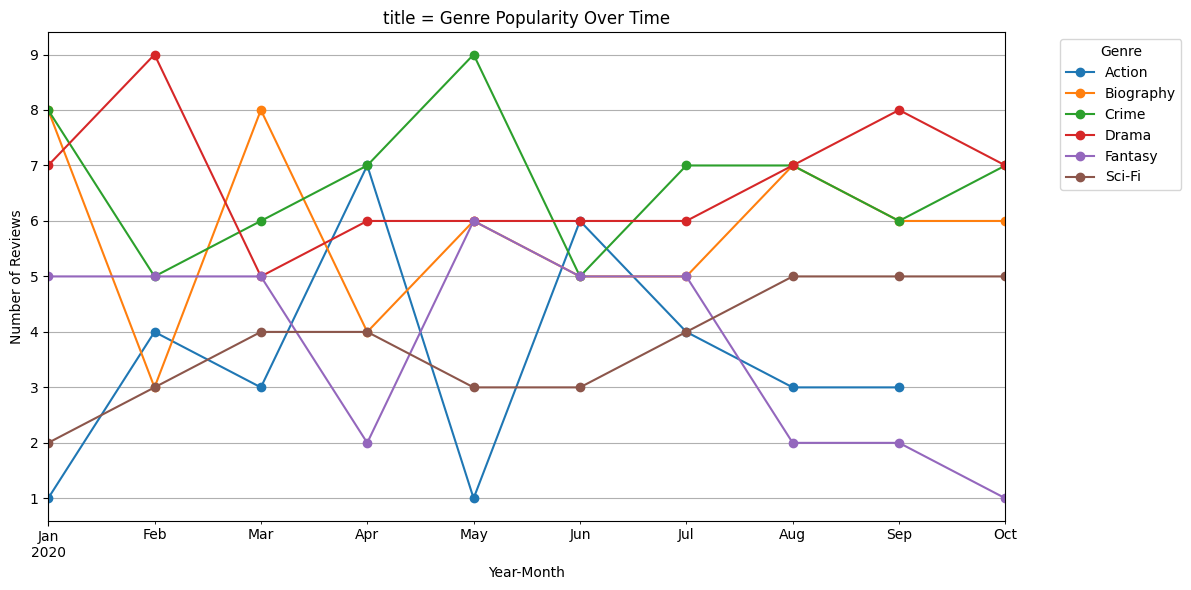

In [26]:

inner_movies_reviews["review_date"] = pd.to_datetime(inner_movies_reviews["review_date"]) #converting review_date

inner_movies_reviews["year_month"] = inner_movies_reviews["review_date"].dt.to_period("M")  # year and month from 'review_date'

genre_popularity = inner_movies_reviews.groupby(["genre", "year_month"]).size().reset_index(name = "review_count") #Group by genre and year_month to do the count

pivot_genre_popularity = genre_popularity.pivot_table(index = 'year_month', columns = "genre", values = "review_count")

# Step 5: Plot the data
pivot_genre_popularity.plot(kind = "line", figsize = (12, 6), marker = "o")
plt.xlabel("Year-Month")
plt.ylabel("Number of Reviews")
plt.title("title = Genre Popularity Over Time")
plt.grid(True)
plt.legend(title = "Genre", bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()